In [227]:
import pandas as pd
import numpy as np
from tensorflow import keras as kr
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [228]:
merged_data = pd.read_excel("final_data.xlsx")

In [229]:
keep_columns=['Open','High','Low','Volume','Subjectivity','Polarity','Compound']    

In [230]:
all_input_values=merged_data[keep_columns].values #numpy array.

In [231]:
model_input=[]
count_day=5
pred_day_count=1

j=0
temp=[]
for i in range(0,len(all_input_values)-5):
    temp=all_input_values[i:i+count_day]
    model_input.append(temp)


print(len(model_input))  
print("-------------")
print(model_input[1])
print("-------------")
print(model_input[2])

741
-------------
[[3.06100006e+02 3.15130005e+02 2.98799988e+02 1.16586480e+07
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.07000000e+02 3.09399994e+02 2.97380005e+02 6.96518400e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.06000000e+02 3.18000000e+02 3.02730011e+02 7.39411600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.21720001e+02 3.36739990e+02 3.17750793e+02 7.55122500e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.41959991e+02 3.44010010e+02 3.27019989e+02 7.00851600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]]
-------------
[[3.07000000e+02 3.09399994e+02 2.97380005e+02 6.96518400e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.06000000e+02 3.18000000e+02 3.02730011e+02 7.39411600e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.21720001e+02 3.36739990e+02 3.17750793e+02 7.55122500e+06
  5.00000000e-01 0.00000000e+00 0.00000000e+00]
 [3.41959991e+02 3.44010010e+02 3.27019989e+02 7.00851600e+06
  5.00000000e-01 0.000000

In [232]:
model_input=np.array(model_input)
print(model_input.shape)

(741, 5, 7)


In [233]:
all_close_values = merged_data['Close'].values

In [234]:
model_close_values=[]
for i in range(5,len(all_close_values)):
    model_close_values.append(all_close_values[i])

In [235]:
model_close_values=np.array(model_close_values)
print(model_close_values.shape)

print(model_input.shape)

(741,)
(741, 5, 7)


In [236]:
training_size=int(len(model_input)*0.75)
test_size=len(model_input)-training_size
all_input_values_train, all_input_values_test=model_input[0:training_size,:],model_input[training_size:len(model_input),:]

training_size=int(len(model_close_values)*0.75)
all_close_values_train, all_close_values_test = model_close_values[0:training_size], model_close_values[training_size:len(model_close_values)]

In [237]:
all_close_values_train[0:5]

array([335.350006, 338.529999, 344.970001, 347.26001 , 334.399994])

In [238]:
all_close_values_train=np.array(all_close_values_train)
all_close_values_test=np.array(all_close_values_test)

In [239]:
all_input_values_train[0:2]

array([[[3.37790009e+02, 3.39209991e+02, 3.25260010e+02, 6.30233800e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06100006e+02, 3.15130005e+02, 2.98799988e+02, 1.16586480e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.07000000e+02, 3.09399994e+02, 2.97380005e+02, 6.96518400e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06000000e+02, 3.18000000e+02, 3.02730011e+02, 7.39411600e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.21720001e+02, 3.36739990e+02, 3.17750793e+02, 7.55122500e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00]],

       [[3.06100006e+02, 3.15130005e+02, 2.98799988e+02, 1.16586480e+07,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.07000000e+02, 3.09399994e+02, 2.97380005e+02, 6.96518400e+06,
         5.00000000e-01, 0.00000000e+00, 0.00000000e+00],
        [3.06000000e+02, 3.18000000e+02, 3.02730011e+02, 7.39411600e+06,
        

In [240]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(555, 5, 7) (186, 5, 7) (555,) (186,)


In [241]:
all_close_values_train.shape

(555,)

In [242]:
all_input_values_train=np.reshape(all_input_values_train,(all_input_values_train.shape[0],all_input_values_train.shape[1]*all_input_values_train.shape[2]))
print(all_input_values_train.shape)

(555, 35)


In [243]:
all_input_values_test=np.reshape(all_input_values_test,(all_input_values_test.shape[0], all_input_values_test.shape[1]*all_input_values_test.shape[2]))
print(all_input_values_test.shape)

(186, 35)


In [244]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
all_input_values_train=scaler.fit_transform(all_input_values_train) # hem fit ediyor hem de scale ediyor
all_input_values_test=scaler.transform(all_input_values_test) # sadece transform olacak. cünkü model bu veriyi eğitim esnasında görmeyecek 


In [245]:
all_close_values_train = np.array([all_close_values_train]).T
all_close_values_test = np.array([all_close_values_test]).T

In [246]:
print(all_input_values_train.shape, all_input_values_test.shape, all_close_values_train.shape, all_close_values_test.shape)

(555, 35) (186, 35) (555, 1) (186, 1)


In [247]:
scaler2 = StandardScaler()
all_close_values_train = scaler2.fit_transform(all_close_values_train)
all_close_values_test = scaler2.transform(all_close_values_test)

In [248]:
all_close_values_train.shape

(555, 1)

In [249]:
all_close_values_test.shape

(186, 1)

In [250]:
all_input_values_train.shape

(555, 35)

In [251]:
all_input_values_test.shape

(186, 35)

In [252]:
# Taban model ile ana model birleştirilir. 

model=Sequential()
model.add(LSTM(units = 50, input_shape = (all_input_values_train.shape[1],1), return_sequences=True))
model.add(LSTM(units=50))
# model.add(LSTM(units=50,return_sequences=True))
# model.add(LSTM(units=50))
model.add(Flatten())
model.add(Dense(units = 128))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [253]:
model = model(inputs=baseModel.input, outputs=headModel)

NameError: name 'baseModel' is not defined

In [254]:
opt = kr.optimizers.Adam(lr=0.001, decay=1e-4)

/home/serhatoner/.local/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [255]:
model.compile(optimizer=opt, loss='mean_squared_error') #learning rate atanabilir.

In [256]:
model.fit(all_input_values_train, all_close_values_train, epochs=100,batch_size=8,verbose=1)

Epoch 1/100
70/70 [==============================] - 7s 37ms/step - loss: 0.3904
Epoch 2/100
70/70 [==============================] - 3s 37ms/step - loss: 0.1250
Epoch 3/100
70/70 [==============================] - 3s 36ms/step - loss: 0.1131
Epoch 4/100
70/70 [==============================] - 3s 39ms/step - loss: 0.1070
Epoch 5/100
70/70 [==============================] - 3s 37ms/step - loss: 0.1049
Epoch 6/100
70/70 [==============================] - 3s 37ms/step - loss: 0.1132
Epoch 7/100
70/70 [==============================] - 3s 36ms/step - loss: 0.1023
Epoch 8/100
70/70 [==============================] - 3s 36ms/step - loss: 0.1122
Epoch 9/100
70/70 [==============================] - 2s 35ms/step - loss: 0.0938
Epoch 10/100
70/70 [==============================] - 2s 36ms/step - loss: 0.0942
Epoch 11/100
70/70 [==============================] - 3s 36ms/step - loss: 0.1211
Epoch 12/100
70/70 [==============================] - 2s 35ms/step - loss: 0.0888
Epoch 13/100
70/70 [=====

In [257]:
train_predict=model.predict(all_input_values_train)
test_predict=model.predict(all_input_values_test)

#train_predict = train_predict.reshape((train_predict.shape[0],5,1))
#test_predict = test_predict.reshape((test_predict.shape[0],5,1))

# print('all_close_values_train shape: ', all_close_values_train.shape, '\nall_close_values_train', all_close_values_train[0:5], '\n')
# print('all_close_values_train_predict shape: ', train_predict.shape, '\nall_close_values_train_pred', train_predict[0:5], '\n')
# print('all_close_values_test shape: ', all_close_values_test.shape, '\nall_close_values_test', all_close_values_test[0:5], '\n')
# print('all_close_values_test_pred shape: ', test_predict.shape, '\nall_close_values_test_pred', test_predict[0:5])

print('all_close_values_train shape: ', all_close_values_train.shape)

print('all_close_values_test shape: ', all_close_values_test.shape)
print('all_close_values_test_pred shape: ', test_predict.shape)
print('all_close_values_test_pred shape: ', test_predict.shape)


all_close_values_train shape:  (555, 1)
all_close_values_test shape:  (186, 1)
all_close_values_test_pred shape:  (186, 1)
all_close_values_test_pred shape:  (186, 1)


In [258]:
test_predict[0]

array([1.621931], dtype=float32)

In [259]:
score = model.evaluate(all_input_values_test, all_close_values_test)

6/6 [==============================] - 1s 16ms/step - loss: 0.2822


In [260]:
model.evaluate(all_input_values_train, all_close_values_train)

18/18 [==============================] - 0s 15ms/step - loss: 0.0312


0.031155336648225784

In [196]:
score

0.15098567306995392

In [155]:
# test_predict = test_predict.reshape((test_predict.shape[0],5))

ValueError: cannot reshape array of size 186 into shape (186,5)

In [33]:
# train_predict = train_predict.reshape((train_predict.shape[0],5))

In [261]:
test_predict = scaler2.inverse_transform(test_predict)
train_predict = scaler2.inverse_transform(train_predict)

In [262]:
train_predict.shape

(555, 1)

In [199]:
#test_predict=test_predict.reshape((test_predict.shape[0]*test_predict.shape[1],1))

In [200]:
test_predict.shape

(186, 1)

In [177]:
# train_predict = np.array(train_predict).T
# test_predict = np.array(test_predict).T

In [263]:
all_close_values_test=np.array(all_close_values_test)
print(all_close_values_test.shape)

(186, 1)


In [264]:
test_predict.shape

(186, 1)

In [265]:
all_close_values_train = scaler2.inverse_transform(all_close_values_train)
all_close_values_test = scaler2.inverse_transform(all_close_values_test)

In [205]:
all_close_values_test.shape

(186, 1)

In [266]:
mape_test = mean_absolute_percentage_error(all_close_values_test, test_predict)
mape_train = mean_absolute_percentage_error(all_close_values_train, train_predict)
print(mape_test)
print(mape_train)

0.07002470840570149
0.04469678565308435


In [267]:
rmse = np.sqrt(mean_squared_error(all_close_values_test, test_predict)) #neden yüksek çıkıyor, mape ile karşılastır tekrar bak
print(rmse)

103.52807658536122


In [268]:
train_predict=np.array(train_predict)
train_predict.shape

(555, 1)

In [269]:
test=all_close_values[5:]
train_predict[1]

array([338.56256], dtype=float32)

In [270]:
model_close_values

array([ 335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.059998,
        268.420013,  267.700012,  266.380005,  273.359985,  271.

In [212]:
all_close_values

array([ 332.799988,  310.119995,  300.359985,  317.690002,  334.959991,
        335.350006,  338.529999,  344.970001,  347.26001 ,  334.399994,
        344.429993,  346.049988,  347.309998,  302.26001 ,  298.920013,
        287.589996,  291.51001 ,  297.040009,  296.380005,  297.459991,
        308.769989,  307.019989,  312.209991,  312.890015,  321.350006,
        317.220001,  307.51001 ,  305.799988,  312.839996,  311.809998,
        308.170013,  303.769989,  307.880005,  305.640015,  302.559998,
        291.230011,  294.709991,  298.769989,  297.859985,  314.73999 ,
        319.880005,  294.790009,  285.359985,  276.540009,  276.23999 ,
        276.589996,  284.140015,  290.920013,  283.359985,  288.959991,
        289.959991,  275.429993,  269.48999 ,  267.470001,  273.600006,
        274.019989,  264.529999,  260.420013,  267.769989,  274.829987,
        278.619995,  279.859985,  289.179993,  285.880005,  291.809998,
        267.779999,  274.959991,  273.200012,  272.309998,  276.

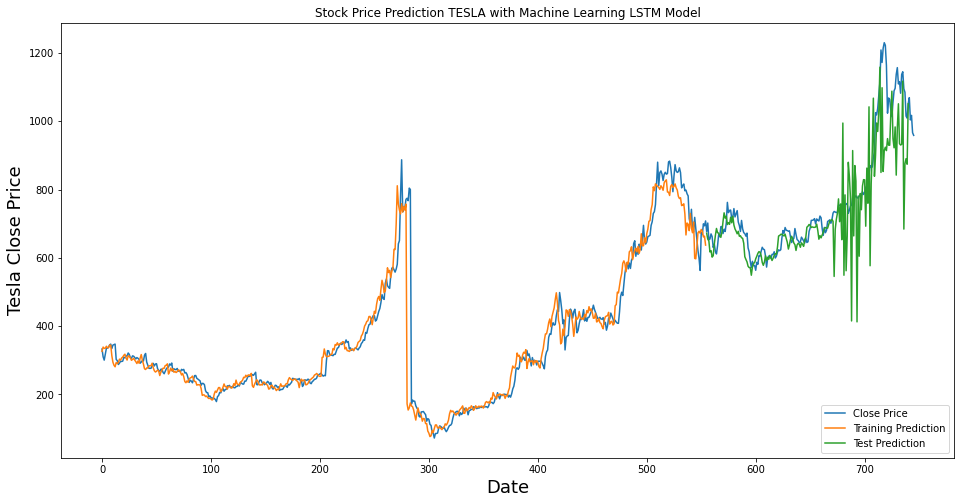

In [271]:
#look_back = 7
plt.figure(figsize=(16,8))
plt.title('Stock Price Prediction TESLA with Machine Learning LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Tesla Close Price', fontsize=18)
plt.plot(all_close_values)
plt.plot(train_predict)
plt.plot(np.arange(len(test_predict)) + len(all_close_values_train), test_predict)
plt.legend(['Close Price', 'Training Prediction', 'Test Prediction'], loc='lower right')
plt.show() 